In [1]:
%pip install yadisk
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import yadisk
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
yandex_disk_token = "<TOKEN>"
disk_path = "Хакатон ЦП/train_dataset_train.zip"
disk = yadisk.YaDisk(token=yandex_disk_token)
if not os.path.exists("train_dataset_train.zip"):
    disk.download(disk_path, "train_dataset_train.zip")
disk_path = "Хакатон ЦП/quarterly.csv"
if not os.path.exists("quarterly.csv"):
    disk.download(disk_path, "quarterly.csv")
disk_path = "Хакатон ЦП/test_dataset_test.zip"
if not os.path.exists("test_dataset_test.zip"):
    disk.download(disk_path, "test_dataset_test.zip")

In [4]:
!unzip train_dataset_train.zip

Archive:  train_dataset_train.zip


replace train/cntrbtrs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


Exception: Process exited with code 1

In [9]:
!unzip test_dataset_test.zip

Archive:  test_dataset_test.zip
   creating: test/
  inflating: test/test.csv           
  inflating: __MACOSX/test/._test.csv  
  inflating: test/sample_submission.csv  
  inflating: __MACOSX/test/._sample_submission.csv  


In [44]:
from sklearn.model_selection import train_test_split
raw_data_test = pd.read_csv("test/test.csv")
raw_data_test['type'] = 'test'
raw_data_train = pd.read_csv("train/train.csv")
train, val = train_test_split(raw_data_train, test_size=0.2)
train['type'] = 'train'
val['type'] ='val'

In [46]:
raw_data = pd.concat((train, val, raw_data_test))

In [47]:
raw_data[raw_data['churn'] == 1]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,oprtn_sum_per_year,frst_pmnt_date,lst_pmnt_date_per_qrtr,frst_pmnt,lst_pmnt,pmnts_sum,pmnts_nmbr,pmnts_sum_per_qrtr,pmnts_sum_per_year,pmnts_nmbr_per_qrtr,pmnts_nmbr_per_year,incm_sum,incm_per_qrtr,incm_per_year,mgd_accum_period,mgd_payment_period,phone_number,email,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,type
2995127,0,0x31E80E4658412F449EC5C5B42A260A78,0x80109D34341F2A4BAE78EAA90EAD2C94,1,2,2014,2014Q1,-1,57,5408,3356,36,89271.12,45443.68,-31551.63,2004-12-31,2014-03-10,5953.78,295.06,32429.94,112,823.41,823.41,3,3,12220.91,-0.00,-0.00,0.0,0.0,-1,0,-1,-1,-1,398046.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,1.0,train
1843599,1,0xFB82AB5B373413478B7F1CA9C15B3099,0xA1BD0AB8D282F243AB3C4FD38F160DB4,2,2,2021,2021Q1,-1,36,1155,1096,40,136776.99,8013.25,-123726.78,2018-01-31,2021-01-31,3079.26,3928.82,127181.36,74,7857.64,7857.64,4,4,7077.15,-0.00,-0.00,0.0,0.0,0,0,1,-1,-1,188677.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,1,0,1,1.0,train
252981,0,0x97D19B6DBADCC944A8DB0A3B4294C0C7,0xDB1BA4E86D1B81429FBE12B28B9804C7,2,2,2012,2012Q2,1,37,4736,2715,33,41905.09,1455.91,-30706.84,2004-12-31,2012-06-07,5388.69,752.68,33911.71,89,1455.91,4379.49,3,8,7993.37,-0.00,-0.00,0.0,0.0,-1,0,-1,-1,-1,398043.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,1.0,train
1661049,0,0x80D9613578E2D64DACFCC306FDCF11ED,0x22F0F8B76A082A4AA6657E16CE4A6919,1,2,2017,2017Q1,-1,33,546,457,34,5138.48,414.63,-4703.80,2015-11-01,2017-01-31,72.35,414.63,5098.37,16,414.63,414.63,1,1,40.10,-0.00,-0.00,0.0,0.0,-1,0,-1,-1,-1,399782.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,1.0,train
2954490,0,0x10EF7B7A2B754844B0BCCBB40C389B31,0xA62A005056964A2C11ED6FE54B08E6C5,5,3,2022,2022Q2,-1,41,232,210,33,39413.24,16213.03,-7900.07,2021-11-10,2022-06-08,3743.21,7149.95,39370.98,8,16213.03,31513.17,3,6,42.25,-0.00,-0.00,0.0,0.0,-1,0,1,-1,-1,662161.0,КРАСНОЯРСКИЙ КРАЙ,1,1,0,1,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221984,2,0xE851494ADB7718429CAE72AF8AD9B295,0x9DFC2E6E0C3FEF44BC2DDC889AD5E963,1,2,2019,2019Q4,-1,64,6645,0,5114,7808.47,300.33,300.33,2005-12-31,NaN,1951.22,1951.22,1951.22,1,-0.00,-0.00,0,0,4033.68,300.32,300.32,4.0,4.0,-1,-1,-1,-1,-1,162609.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,1.0,val
1587715,0,0xA7BA596C00598246A3E505BF8C2A8B58,0xEADDD93AF09D8D409FEA4A3B1CB53626,3,2,2013,2013Q4,-1,43,5318,3264,29,56156.15,3248.86,7304.29,2004-12-31,2013-12-08,7211.95,562.44,41747.02,107,1678.78,5734.22,3,12,14409.12,1570.07,1570.07,0.0,0.0,-1,0,-1,-1,-1,398043.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,1.0,val
2657435,0,0xB6F060BBC5A2DF42BFB3339C1F8BC0AF,0x54B249BCB4B55948999A612AF442E156,1,2,2014,2014Q1,-1,59,5408,3356,36,99177.72,51019.14,-36753.77,2004-12-31,2014-03-10,4018.01,206.26,38184.04,107,1222.55,1222.55,3,3,11197.09,-0.00,-0.00,0.0,0.0,-1,0,-1,-1,-1,398046.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,1.0,val
1175920,0,0x8C5A4CAF6AB6444DB4109A85532E9D19,0x73DAF7FE890CAF4AAB8E50BBF3A0987B,1,2,2005,2005Q3,1,42,1999,251,30,9388.91,558.87,-5615.76,2004-12-31,2005-09-08,5943.95,203.26,7385.99,10,558.87,1645.30,3,10,2002.91,-0.00,328.17,0.0,0.0,-1,0,-1,-1,-1,NaN,NaN,-1,-1,0,1,1.0,val


In [48]:
raw_data[raw_data['client_id'] == "0x04F305A6C59E984FAB50F1CCF18E0496"].sort_values('year')

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,oprtn_sum_per_year,frst_pmnt_date,lst_pmnt_date_per_qrtr,frst_pmnt,lst_pmnt,pmnts_sum,pmnts_nmbr,pmnts_sum_per_qrtr,pmnts_sum_per_year,pmnts_nmbr_per_qrtr,pmnts_nmbr_per_year,incm_sum,incm_per_qrtr,incm_per_year,mgd_accum_period,mgd_payment_period,phone_number,email,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,type
2285674,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2013,2013Q3,1,36,84,63,0,7738.05,7738.05,14651.21,2013-07-08,2013-09-09,1614.86,3278.11,7738.05,3,7738.05,14369.64,3,6,-0.00,-0.00,281.57,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,val
1860202,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2013,2013Q4,1,36,176,153,29,14651.21,6913.16,14651.21,2013-07-08,2013-12-08,1614.86,3278.11,14369.64,6,6631.59,14369.64,3,6,281.57,281.57,281.57,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
1424956,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2014,2014Q2,1,37,357,335,28,31309.93,9534.25,39377.51,2013-07-08,2014-06-08,1614.86,3278.11,31028.36,12,9534.25,37217.68,3,12,281.57,-0.00,2159.82,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
2975525,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2014,2014Q1,1,37,266,245,36,21775.68,7124.47,39377.51,2013-07-08,2014-03-10,1614.86,3278.11,21494.11,9,7124.47,37217.68,3,12,281.57,-0.00,2159.82,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
3406164,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2014,2014Q4,1,37,541,518,30,54028.72,11834.59,39377.51,2013-07-08,2014-12-08,1614.86,3278.11,51587.32,18,9674.76,37217.68,3,12,2441.39,2159.82,2159.82,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,val
2322000,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2014,2014Q3,1,37,449,426,31,42194.13,10884.20,39377.51,2013-07-08,2014-09-07,1614.86,3278.11,41912.56,15,10884.19,37217.68,3,12,281.57,-0.00,2159.82,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
1142647,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2015,2015Q1,1,38,632,605,36,59585.01,5556.29,33863.64,2013-07-08,2015-03-05,1614.86,3278.11,57143.61,21,5556.29,28297.71,3,12,2441.39,-0.00,5565.92,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
3240345,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2015,2015Q3,1,38,815,792,30,78225.56,9242.16,33863.64,2013-07-08,2015-09-08,1614.86,3278.11,75784.17,27,9242.16,28297.71,3,12,2441.39,-0.00,5565.92,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
2936506,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2015,2015Q4,1,38,907,883,30,87892.36,9666.80,33863.64,2013-07-08,2015-12-08,1614.86,3278.11,79885.04,30,4100.87,28297.71,3,12,8007.31,5565.92,5565.92,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train
427907,0,0x04F305A6C59E984FAB50F1CCF18E0496,0x17AA4D9556DBC64DA3D6BD7F1C1B9F0C,1,1,2015,2015Q2,1,38,723,700,34,68983.40,9398.39,33863.64,2013-07-08,2015-06-08,1614.86,3278.11,66542.01,24,9398.39,28297.71,3,12,2441.39,-0.00,5565.92,0.0,0.0,-1,0,1,-1,-1,628462.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,0,0,0.0,train


In [72]:
@njit
def get_future_churn(ts, ids, values, window = 2):
    churn_pointer = 0
    churn_sum = 0
    res = np.zeros(ts.size)
    for X_pointer in range(len(ts)):
        while churn_pointer < len(ts) and ts[churn_pointer] < ts[X_pointer] + window and ids[X_pointer] == ids[churn_pointer]:
            churn_sum += values[churn_pointer]
            churn_pointer += 1
        if churn_sum > 0:
            res[X_pointer] = 1
        else:
            if churn_pointer != len(ts) or ts[churn_pointer - 1] >= ts[X_pointer] + window // 2:
                res[X_pointer] = 0
            else:
                res[X_pointer] = np.nan
        churn_sum -= values[X_pointer]
    return res

@njit
def get_features_lags(ts, ids, values, lag):
    l_pointer = 0
    res = np.zeros(ts.size)
    for X_pointer in range(len(ts)):
        while ids[l_pointer] != ids[X_pointer] or ts[l_pointer] < ts[X_pointer] - lag:
            l_pointer += 1
        res[X_pointer] = values[l_pointer]
    return res

@njit
def get_moving_average(ts, ids, values, window):
    l_pointer = 0
    res = np.zeros(ts.size)
    sum_values = 0
    cnt_values = 0
    for X_pointer in range(len(ts)):
        sum_values += values[X_pointer]
        cnt_values += 1
        while ids[l_pointer] != ids[X_pointer] or ts[l_pointer] < ts[X_pointer] - lag:
            sum_values -= values[l_pointer]
            cnt_values -= 1
            l_pointer += 1
        res[X_pointer] = sum_values / cnt_values
    return res

@njit
def get_volitiles(ts, ids, values, window):
    l_pointer = 0
    res = np.zeros(ts.size)
    sum_values = 0
    sum2_values = 0
    cnt_values = 0
    for X_pointer in range(len(ts)):
        sum_values += values[X_pointer]
        sum2_values += values[X_pointer]**2
        cnt_values += 1
        while ids[l_pointer] != ids[X_pointer] or ts[l_pointer] < ts[X_pointer] - lag:
            sum_values -= values[l_pointer]
            sum2_values -= values[l_pointer]**2
            cnt_values -= 1
            l_pointer += 1
        res[X_pointer] = (sum2_values - 2 * values[X_pointer] * sum_values + values[X_pointer]**2 * cnt_values) / cnt_values
    return res

@njit
def calculate_group_mean(groups, values):
    sums = Dict.empty(
        key_type=types.int64,
        value_type=types.float64,
    )
    count = Dict.empty(
        key_type=types.int64,
        value_type=types.float64,
    )
    res = np.zeros(len(values))
    for i in range(len(values)):
        if groups[i] not in sums:
            sums[groups[i]] = 0
            count[groups[i]] = 0
        if not np.isnan(values[i]):
            sums[groups[i]] += values[i]
            count[groups[i]] += 1
    for i in range(len(values)):
        res[i] = sums[groups[i]] / count[groups[i]]
    return res


In [102]:
# build training dataset
data = raw_data.copy()
data['quarter_str'] = data['quarter']
data['quarter'] = data['quarter'].str.split("Q").str.get(1).astype(int)
data['quarter_stamp'] = data['year'] * 4 + data['quarter']
data['npo_account_id_hash'] = data['npo_account_id'].apply(hash)
data['client_id_hash'] = data['client_id'].apply(hash)
data['region_hash'] = data['region'].apply(hash)
data = data.sort_values(['npo_account_id_hash', 'quarter_stamp'])

In [103]:
# data['target'] = get_future_churn(np.array(data['quarter_stamp'].values), np.array(data['npo_account_id_hash'].values), np.array(np.array(data['churn'].values)))
data['target'] = data['churn']

In [104]:
values = {"pmnts_type": 0,
          "clnt_cprtn_time_d": 0,
          "actv_prd_d": 0,
          "age": data['age'].mean(skipna=True),
          "balance": 0,
          "oprtn_sum_per_qrtr": 0,
          "oprtn_sum_per_year": 0,
          "frst_pmnt": 0,
          "lst_pmnt": 0,
          "pmnts_sum": 0,
          "pmnts_nmbr": 0,
          "pmnts_sum_per_qrtr": 0,
          "pmnts_sum_per_year": 0,
          "pmnts_nmbr_per_year": 0,
          "pmnts_nmbr_per_qrtr": 0,
          "incm_sum": 0,
          "incm_per_qrtr": 0,
          "incm_per_year": 0,
          "mgd_accum_period": 0,
          "mgd_payment_period": 0,
          "phone_number": 0,
          "email": 0,
          "region": "No region",
          "appl_mrkr": -1,
          "evry_qrtr_pmnt": -1
         }
data = data.fillna(value=values)

In [105]:
# if training:
#     data = data[data['target'].notna()]

In [106]:
# stupid features
data['pmnts_mean'] = data['pmnts_sum'] / data['pmnts_nmbr'].clip(1)
data['pmnts_mean_per_qrtr'] = data['pmnts_sum_per_qrtr'] / data['pmnts_nmbr_per_qrtr'].clip(1)
data['pmnts_mean_per_year'] = data['pmnts_sum_per_year'] / data['pmnts_nmbr_per_year'].clip(1)


In [107]:
# timeseries features
lag_columns = ['balance', 
               'clnt_cprtn_time_d',
               'actv_prd_d', 
               'oprtn_sum_per_qrtr', 
               'oprtn_sum_per_year',
               'mgd_payment_period',
               'pmnts_sum_per_qrtr',
               'pmnts_sum_per_year',
               'pmnts_nmbr_per_qrtr',
               'pmnts_nmbr_per_year'
              ]
ts = np.array(data['quarter_stamp'])
ids = np.array(data['npo_account_id_hash'])

for column in lag_columns:
    for lag in [1, 2, 4, 8]:
        data[f'{column}_lag_{lag}'] =  get_features_lags(ts, ids, np.array(data[column]), lag)
        data[f'{column}_MA_{lag}'] = get_moving_average(ts, ids, np.array(data[column]), lag)
        # data[f'{column}_VOL_{lag}'] = get_volitiles(ts, ids, np.array(data[column]), lag)

In [108]:
data = data.sort_values(by='quarter_stamp')

In [109]:
from numba.typed import Dict
from numba import types

In [110]:
# aggregation_features
group_by_columns = ['client_id_hash', 'quarter', 'gender', 'email', 'lk', 'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt', 'region_hash']
to_group = ['oprtn_sum_per_year', 'pmnts_sum_per_year', 'target']
for by in tqdm(group_by_columns):
    for column in to_group:
        if by == 'client_id_hash' and column == 'target':
            continue
        data[f'{column}_by_{by}'] = calculate_group_mean(np.array(data[by]), np.array(data[column]))


100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


In [111]:
#external features
quarterly = pd.read_csv('quarterly.csv')
quarterly.index = quarterly['year'] * 4 + quarterly['quarter'] + 1
data = data.join(quarterly.drop(columns=['year', 'quarter']), on = "quarter_stamp")

In [112]:
data.isna().sum()[data.isna().sum() > 0]

frst_pmnt_date              37999
lst_pmnt_date_per_qrtr    1359884
postal_code                117716
churn                      633434
target                     633434
dtype: int64

In [113]:
# # Select columns with 'float64' dtype  
# float64_cols = list(data.select_dtypes(include='float64'))

# # The same code again calling the columns
# data[float64_cols] = data[float64_cols].astype('float32')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4223352 entries, 190244 to 1041929
Columns: 163 entries, slctn_nmbr to cb_rate
dtypes: float64(130), int64(26), object(7)
memory usage: 5.2+ GB


In [115]:
from sklearn.model_selection import train_test_split
# train_df, test_df = data[data['year'] < 2016], data[data['year'] >= 2016]
train_df, val_df, test_df = data[data['type'] == 'train'], data[data['type'] == 'val'], data[data['type'] == 'test']

In [116]:
remove = ['quarter_str', 'slctn_number','frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'target', 'postal_code', 'client_id', 'npo_account_id', 'year', 'region', 'quarter_stamp', 'npo_account_id_hash', 'client_id_hash', 'churn', 'type']
num_features = list(set(data.columns) - set(remove))
cat_features = [
    "region",
]

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [118]:
import gc
gc.collect()

238

In [119]:
lr = LogisticRegression(C = 0.1)
scaler = StandardScaler()
lr.fit(scaler.fit_transform(train_df[num_features]), train_df['target'])

LogisticRegression(C=0.1)

In [120]:
train_pred = lr.predict(scaler.transform(train_df[num_features]))
val_pred = lr.predict(scaler.transform(val_df[num_features]))
from sklearn.metrics import f1_score
print("Train score: ", f1_score(train_pred, train_df['target']))
print("Val score: ", f1_score(val_pred, val_df['target']))


Train score:  0.3808397195220216
Val score:  0.3776185971077173


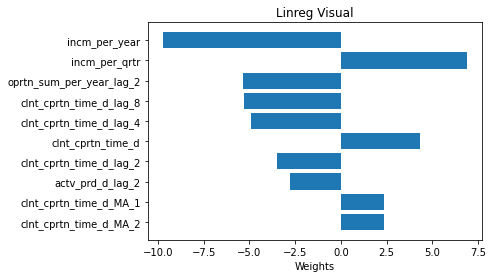

In [121]:
coefs = lr.coef_[0]
main_columns = num_features
k = 10
ind = np.argsort(abs(coefs))[-k:]
coefs = coefs[ind]
main_columns = [main_columns[index] for index in ind]

_, ax = plt.subplots()
ax.barh(main_columns, coefs)

ax.set_xlabel('Weights')
ax.set_title('Linreg Visual')

plt.show()

In [122]:
train_df['lr_pred'] = lr.predict(scaler.transform(train_df[num_features]))
val_df['lr_pred'] = lr.predict(scaler.transform(val_df[num_features]))
test_df['lr_pred'] = lr.predict(scaler.transform(test_df[num_features]))

In [138]:
catboost_cols = num_features + cat_features + ['lr_pred']
from catboost import CatBoostClassifier, Pool
catb = CatBoostClassifier(max_depth=5, iterations=3000,learning_rate = 0.05, cat_features=cat_features, eval_metric = 'F1')
catb.fit(train_df[catboost_cols], train_df['target'], eval_set = Pool(val_df[catboost_cols], val_df['target'], cat_features=cat_features))

0:	learn: 0.5649368	test: 0.5628057	best: 0.5628057 (0)	total: 716ms	remaining: 35m 48s
1:	learn: 0.5433115	test: 0.5424174	best: 0.5628057 (0)	total: 1.32s	remaining: 33m 1s
2:	learn: 0.5541082	test: 0.5519818	best: 0.5628057 (0)	total: 1.9s	remaining: 31m 39s
3:	learn: 0.5579991	test: 0.5571395	best: 0.5628057 (0)	total: 2.56s	remaining: 31m 55s
4:	learn: 0.5420217	test: 0.5400819	best: 0.5628057 (0)	total: 3.23s	remaining: 32m 17s
5:	learn: 0.4941464	test: 0.4886205	best: 0.5628057 (0)	total: 3.83s	remaining: 31m 50s
6:	learn: 0.4942123	test: 0.4891830	best: 0.5628057 (0)	total: 4.42s	remaining: 31m 30s
7:	learn: 0.4909181	test: 0.4859008	best: 0.5628057 (0)	total: 5.02s	remaining: 31m 18s
8:	learn: 0.4916931	test: 0.4867805	best: 0.5628057 (0)	total: 5.68s	remaining: 31m 26s
9:	learn: 0.4902297	test: 0.4854627	best: 0.5628057 (0)	total: 6.22s	remaining: 30m 58s
10:	learn: 0.5038180	test: 0.4987793	best: 0.5628057 (0)	total: 6.82s	remaining: 30m 54s
11:	learn: 0.5023052	test: 0.4969

In [139]:
train_pred = catb.predict(train_df[catboost_cols])
val_pred = catb.predict(val_df[catboost_cols])

In [140]:
print("Train score: ", f1_score(train_pred, train_df['target']))
print("Val score: ", f1_score(val_pred, val_df['target']))


Train score:  0.8125272862682658
Val score:  0.793103448275862


In [141]:
print("Recall ", recall_score(val_pred, val_df['target']))
print("Precision ", precision_score(val_pred, val_df['target']))


Recall  0.9356955380577427
Precision  0.6882239382239382


In [142]:
(data['churn'] == 1).sum() / len(data)

0.01328044643212311

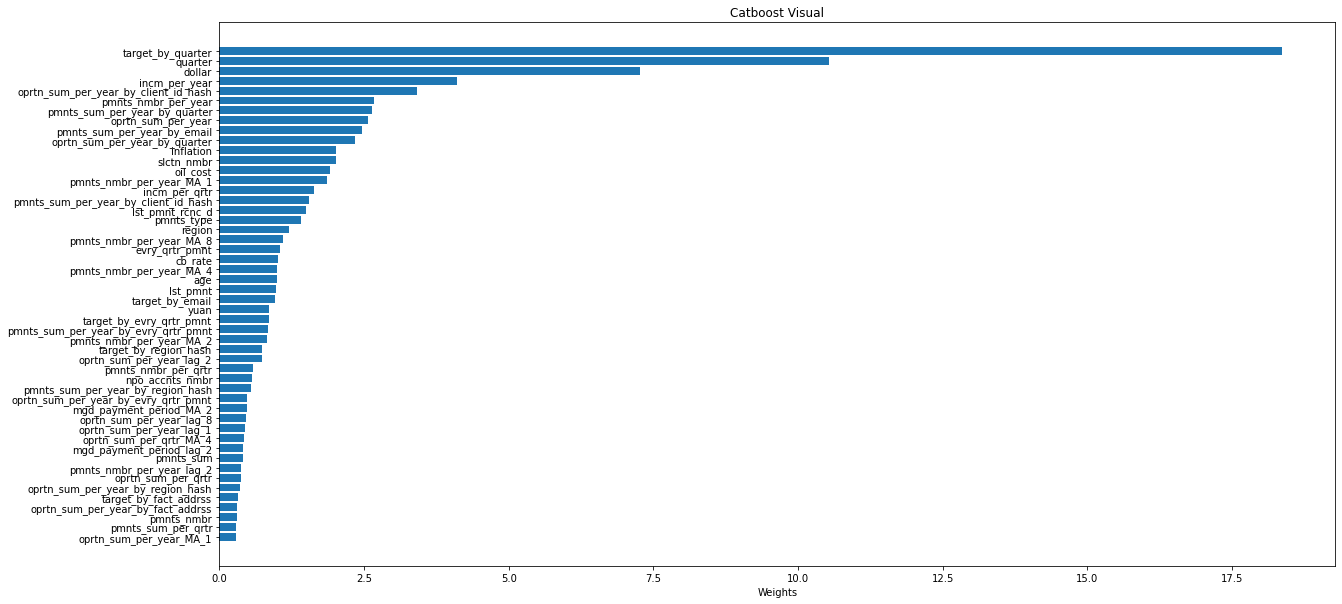

In [143]:
plt.rcParams["figure.figsize"] = (20,10)

coefs = catb.feature_importances_
k = 50
ind = np.argsort(abs(coefs))[-k:]
coefs = coefs[ind]
main_columns = [catboost_cols[index] for index in ind]

_, ax = plt.subplots()
ax.barh(main_columns, coefs)

ax.set_xlabel('Weights')
ax.set_title('Catboost Visual')

plt.show()

In [144]:
data[data['client_id'] == '0x04F305A6C59E984FAB50F1CCF18E0496'][['quarter', 'target']]

,quarter,target
2285674,3,0.0
1860202,4,0.0
2975525,1,0.0
1424956,2,0.0
2322000,3,0.0
3406164,4,0.0
1142647,1,0.0
427907,2,0.0
3240345,3,0.0
2936506,4,0.0


In [151]:
test_df['churn'] = catb.predict(test_df[catboost_cols])

In [152]:
test_df['quarter'] = test_df['quarter_str']

In [153]:
submission = test_df[['npo_account_id', 'quarter', 'churn']]

In [154]:
submission['churn'] = submission['churn'].astype(int)

In [155]:
submission.to_csv("submission.csv", index=False)

In [156]:
import pickle
pickle.dump(scaler, open("scaler.pkl", 'wb'))
pickle.dump(lr, open("lr.pkl", 'wb'))
catb.save_model("catboost.ct")

In [159]:
class ChurnPredictior:
    def __init__(self):
        self.lr = LogisticRegression(C = 0.1)
        self.catb = CatBoostClassifier(max_depth=5, iterations=3000,learning_rate = 0.05, cat_features=cat_features, eval_metric = 'F1')
        self.scaler = StandardScaler()
        self.lr = pickle.load(open("lr.pkl", 'rb'))
        self.scaler = pickle.load(open("scaler.pkl", 'rb'))
        self.catb.load_model("catboost.ct")
    def predict(self,raw_data_test):
        raw_data_test['type'] = 'test'
        raw_data_train = pd.read_csv("train/train.csv")
        train, val = train_test_split(raw_data_train, test_size=0.2)
        train['type'] = 'train'
        val['type'] ='val'
        raw_data = pd.concat((train, val, raw_data_test))
        # build training dataset
        data = raw_data.copy()
        data['quarter_str'] = data['quarter']
        data['quarter'] = data['quarter'].str.split("Q").str.get(1).astype(int)
        data['quarter_stamp'] = data['year'] * 4 + data['quarter']
        data['npo_account_id_hash'] = data['npo_account_id'].apply(hash)
        data['client_id_hash'] = data['client_id'].apply(hash)
        data['region_hash'] = data['region'].apply(hash)
        data = data.sort_values(['npo_account_id_hash', 'quarter_stamp'])
        data['target'] = data['churn']
        values = {"pmnts_type": 0,
          "clnt_cprtn_time_d": 0,
          "actv_prd_d": 0,
          "age": data['age'].mean(skipna=True),
          "balance": 0,
          "oprtn_sum_per_qrtr": 0,
          "oprtn_sum_per_year": 0,
          "frst_pmnt": 0,
          "lst_pmnt": 0,
          "pmnts_sum": 0,
          "pmnts_nmbr": 0,
          "pmnts_sum_per_qrtr": 0,
          "pmnts_sum_per_year": 0,
          "pmnts_nmbr_per_year": 0,
          "pmnts_nmbr_per_qrtr": 0,
          "incm_sum": 0,
          "incm_per_qrtr": 0,
          "incm_per_year": 0,
          "mgd_accum_period": 0,
          "mgd_payment_period": 0,
          "phone_number": 0,
          "email": 0,
          "region": "No region",
          "appl_mrkr": -1,
          "evry_qrtr_pmnt": -1
         }
        data = data.fillna(value=values)
        # stupid features
        data['pmnts_mean'] = data['pmnts_sum'] / data['pmnts_nmbr'].clip(1)
        data['pmnts_mean_per_qrtr'] = data['pmnts_sum_per_qrtr'] / data['pmnts_nmbr_per_qrtr'].clip(1)
        data['pmnts_mean_per_year'] = data['pmnts_sum_per_year'] / data['pmnts_nmbr_per_year'].clip(1)
        # timeseries features
        lag_columns = ['balance', 
                       'clnt_cprtn_time_d',
                       'actv_prd_d', 
                       'oprtn_sum_per_qrtr', 
                       'oprtn_sum_per_year',
                       'mgd_payment_period',
                       'pmnts_sum_per_qrtr',
                       'pmnts_sum_per_year',
                       'pmnts_nmbr_per_qrtr',
                       'pmnts_nmbr_per_year'
                      ]
        ts = np.array(data['quarter_stamp'])
        ids = np.array(data['npo_account_id_hash'])

        for column in lag_columns:
            for lag in [1, 2, 4, 8]:
                data[f'{column}_lag_{lag}'] =  get_features_lags(ts, ids, np.array(data[column]), lag)
                data[f'{column}_MA_{lag}'] = get_moving_average(ts, ids, np.array(data[column]), lag)
                # data[f'{column}_VOL_{lag}'] = get_volitiles(ts, ids, np.array(data[column]), lag)
        # aggregation_features
        group_by_columns = ['client_id_hash', 'quarter', 'gender', 'email', 'lk', 'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt', 'region_hash']
        to_group = ['oprtn_sum_per_year', 'pmnts_sum_per_year', 'target']
        for by in tqdm(group_by_columns):
            for column in to_group:
                if by == 'client_id_hash' and column == 'target':
                    continue
                data[f'{column}_by_{by}'] = calculate_group_mean(np.array(data[by]), np.array(data[column]))
        #external features
        quarterly = pd.read_csv('quarterly.csv')
        quarterly.index = quarterly['year'] * 4 + quarterly['quarter'] + 1
        data = data.join(quarterly.drop(columns=['year', 'quarter']), on = "quarter_stamp")
        # train_df, test_df = data[data['year'] < 2016], data[data['year'] >= 2016]
        train_df, val_df, test_df = data[data['type'] == 'train'], data[data['type'] == 'val'], data[data['type'] == 'test']
        remove = ['quarter_str', 'slctn_number','frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'target', 'postal_code', 'client_id', 'npo_account_id', 'year', 'region', 'quarter_stamp', 'npo_account_id_hash', 'client_id_hash', 'churn', 'type']
        num_features = list(set(data.columns) - set(remove))
        cat_features = [
            "region",
        ]
        test_df['lr_pred'] = self.lr.predict(self.scaler.transform(test_df[num_features]))
        catboost_cols = num_features + cat_features + ['lr_pred']
        test_df['churn'] = catb.predict(test_df[catboost_cols])
        test_df['quarter'] = test_df['quarter_str']
        submission = test_df[['npo_account_id', 'quarter', 'churn']]
        submission['churn'] = submission['churn'].astype(int)
        return submission

In [160]:
predictor = ChurnPredictior()

In [161]:
predictor.predict(raw_data_test)

100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


,npo_account_id,quarter,churn
470564,0x1A9598F517B0914B8F78C19BDE986F15,2011Q3,0
113972,0x1A9598F517B0914B8F78C19BDE986F15,2015Q2,0
32044,0x1A9598F517B0914B8F78C19BDE986F15,2015Q3,0
499563,0x1A9598F517B0914B8F78C19BDE986F15,2016Q1,0
96031,0x45449B6504A39B45BE101824E1FF442A,2005Q2,0
...,...,...,...
30478,0xDC35630C5EAA6E4EAD1B93D6DE59214C,2015Q4,0
248979,0xDC35630C5EAA6E4EAD1B93D6DE59214C,2016Q4,0
196964,0x80D8998BFE01114FAFFF6D549FFFB3BA,2004Q4,0
213835,0xA8922C768A4FB38311E9982983FE5E1F,2013Q2,0
